# TASK 1:
Machine Learning model to predict house
price using linear regression only
Jupyter notebook code

BY SOUVIK PAL

# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
house_data=pd.read_csv('Kolkata_House_Price.csv')

# Data Preprocessing

In [3]:
house_data.head(6)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,2235000,1016,Barasat,3,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,3665999,1111,Keshtopur,2,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3774000,1020,Rajarhat,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2524000,935,Narendrapur,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,8300000,1956,New Town,3,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
5,3761000,1179,Joka,3,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
house_data.shape

(6507, 40)

In [5]:
# number of columns in dataset:
house_data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6507 entries, 0 to 6506
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6507 non-null   int64 
 1   Area                 6507 non-null   int64 
 2   Location             6507 non-null   object
 3   No. of Bedrooms      6507 non-null   int64 
 4   Resale               6507 non-null   int64 
 5   MaintenanceStaff     6507 non-null   int64 
 6   Gymnasium            6507 non-null   int64 
 7   SwimmingPool         6507 non-null   int64 
 8   LandscapedGardens    6507 non-null   int64 
 9   JoggingTrack         6507 non-null   int64 
 10  RainWaterHarvesting  6507 non-null   int64 
 11  IndoorGames          6507 non-null   int64 
 12  ShoppingMall         6507 non-null   int64 
 13  Intercom             6507 non-null   int64 
 14  SportsFacility       6507 non-null   int64 
 15  ATM                  6507 non-null   int64 
 16  ClubHo

In [7]:
house_data['Location'].unique()
# len(house_data.location.unique())

array(['Barasat', 'Keshtopur', 'Rajarhat', 'Narendrapur', 'New Town',
       'Joka', 'Tangra', 'Sonarpur', 'Madhyamgram', 'Dum Dum',
       'Chkravarti Para', 'Tollygunge', 'Sarsuna', 'Ultadanga',
       'Madurdaha Hussainpur', 'New Alipore', 'Mukundapur', 'Kutighat',
       'Behala', 'Sodepur', 'Konnagar', 'Uttarpara Kotrung', 'Baguiati',
       'Hooghly Chinsurah', 'Hussainpur', 'Dum Dum Park', 'Bhadreswar',
       'Garia', 'south dum dum', 'Santoshpur', 'Gariahat', 'Lake Gardens',
       'Kalighat', 'Belghoria', 'Tagore Park', 'Kamardanga', 'Ballygunge',
       'Purba Putiary', 'Ariadaha', 'Rahara', 'Kasba', 'Paschim Putiary',
       'Howrah', 'Barisha Purba Para Road', 'Tiljala', 'Airport',
       'East Kolkata Township', 'raghunathpur', 'Barrackpore',
       'Lake Town', 'Bhawanipur', 'Alipore', 'Park Street Area', 'Elgin',
       'Thakurpukur', 'Ashok Nagar', 'Haltu', 'Salt Lake City',
       'Kaikhali', 'Chinar Park', 'Baranagar', 'Chandannagar', 'Garfa',
       'Jorabagan', 'Ba

In [8]:
house_data['No. of Bedrooms'].value_counts()

3    3128
2    2622
4     512
1     198
5      38
6       8
9       1
Name: No. of Bedrooms, dtype: int64

In [9]:
house_data.duplicated().sum()

232

In [10]:
house_data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,6.507000e+03,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,...,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000,6507.000000
mean,8.508570e+06,1344.166897,2.631166,0.311818,8.899032,8.903028,8.901644,8.901644,8.900415,8.899493,...,8.905025,8.897034,8.899339,8.897034,8.896727,8.896727,8.896880,8.897034,8.896266,8.897034
std,1.465939e+07,807.698043,0.712283,0.463272,0.936229,0.899654,0.912482,0.912482,0.923734,0.932083,...,0.880791,0.953984,0.933467,0.953984,0.956686,0.956686,0.955336,0.953984,0.960724,0.953984
min,2.000000e+06,350.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000e+06,920.000000,2.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,4.940000e+06,1144.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,8.000000e+06,1454.000000,3.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,5.040000e+08,10000.000000,9.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


# Checking if there is some null values or not

In [11]:
house_data.isnull()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6503,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6504,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6505,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
house_data.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [13]:
house_data=house_data.fillna(method='bfill')

In [14]:
house_data.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


# Removing Unnecessary columns

In [15]:
house_data=house_data.drop(['Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       'PowerBackup', 'StaffQuarter','MaintenanceStaff',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', "Children'splayarea", 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
        'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'], axis="columns")

In [16]:
house_data.shape

(6507, 7)

In [17]:
house_data['Price_per_sqft']=house_data['Price']/house_data['Area']

# Data Visualization
Univariate Analysis

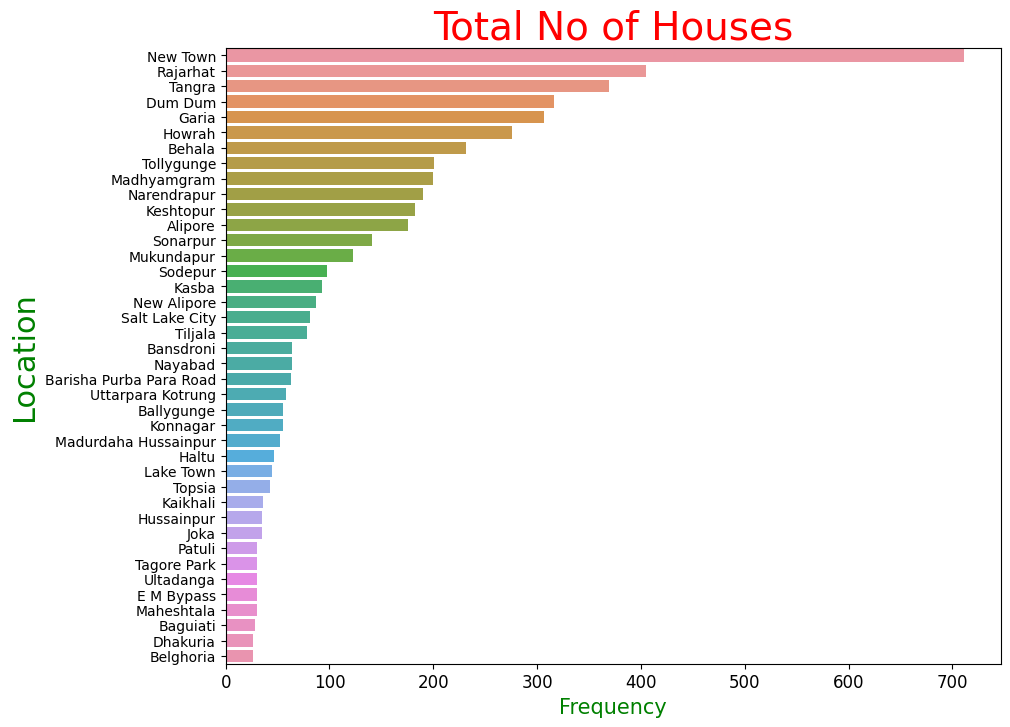

In [18]:
plt.figure(figsize=(10,8))
most_cat=house_data['Location'].value_counts()[:40]
sns.barplot(x=most_cat,y=most_cat.index,data=house_data)
plt.xticks(size=12)
plt.xlabel("Frequency",size=15,c="g")
plt.ylabel("Location",size=22,c="g")
plt.title("Total No of Houses",size=28,c="r")
plt.show()

**conclusion**:Total houses are more in New Town

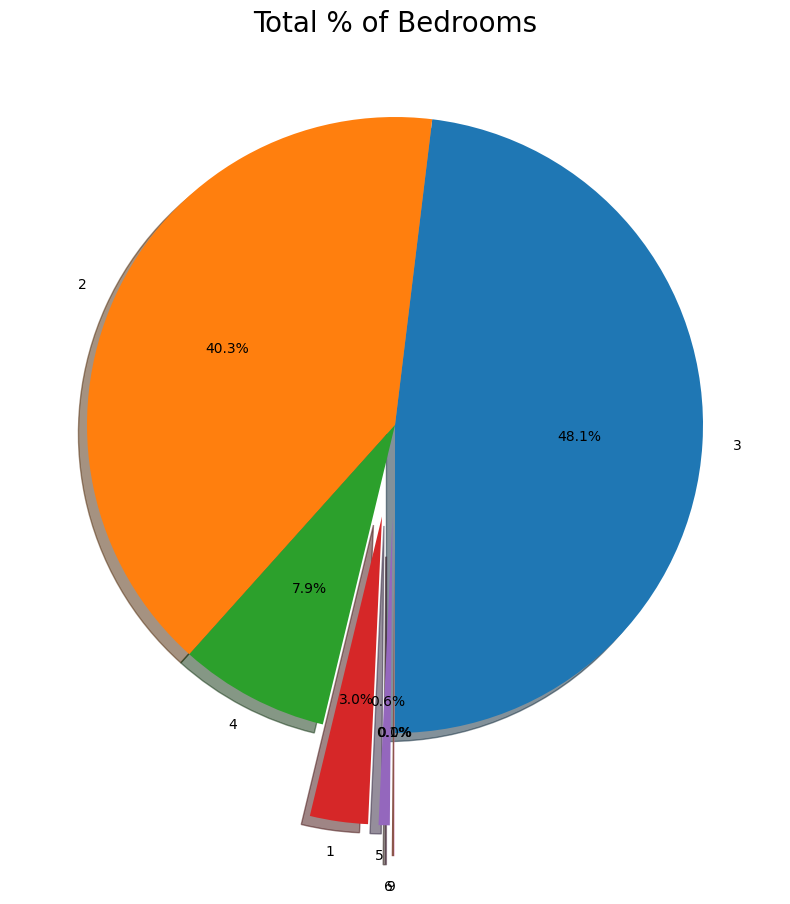

In [19]:
plt.figure(figsize=(10,10))
labels=house_data['No. of Bedrooms'].value_counts(sort=True).index
sizes=house_data['No. of Bedrooms'].value_counts(sort=True)
explode=(0.0,0.0,0.0,0.3,0.3,0.4,0.4)
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,startangle=270,explode=explode)
plt.title('Total % of Bedrooms',size=20)
plt.show()

# Bivariate Analysis 

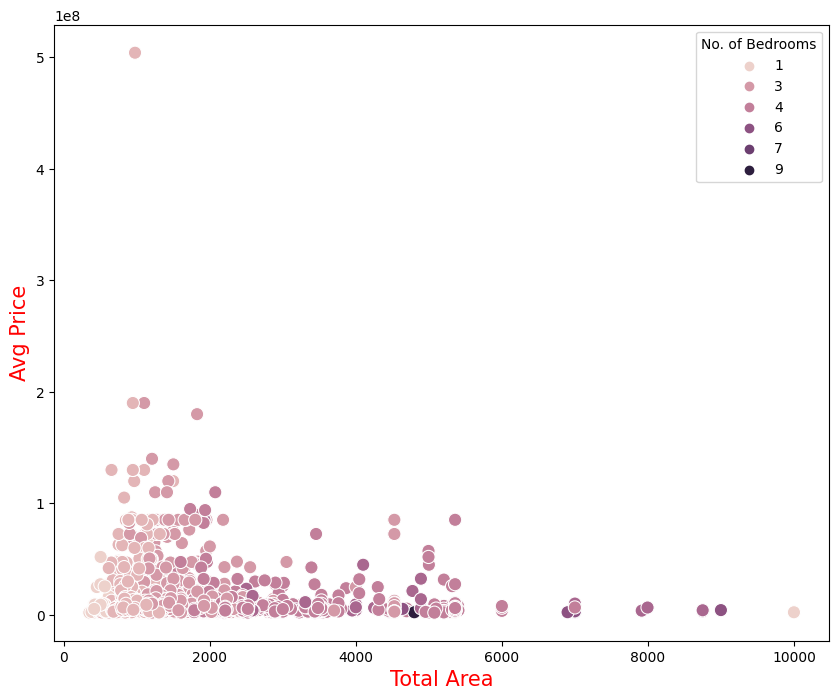

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Area',y='Price',data=house_data,hue='No. of Bedrooms',s=90)
plt.xlabel("Total Area",size=15,c="r")
plt.ylabel("Avg Price",size=15,c="r")
plt.show()

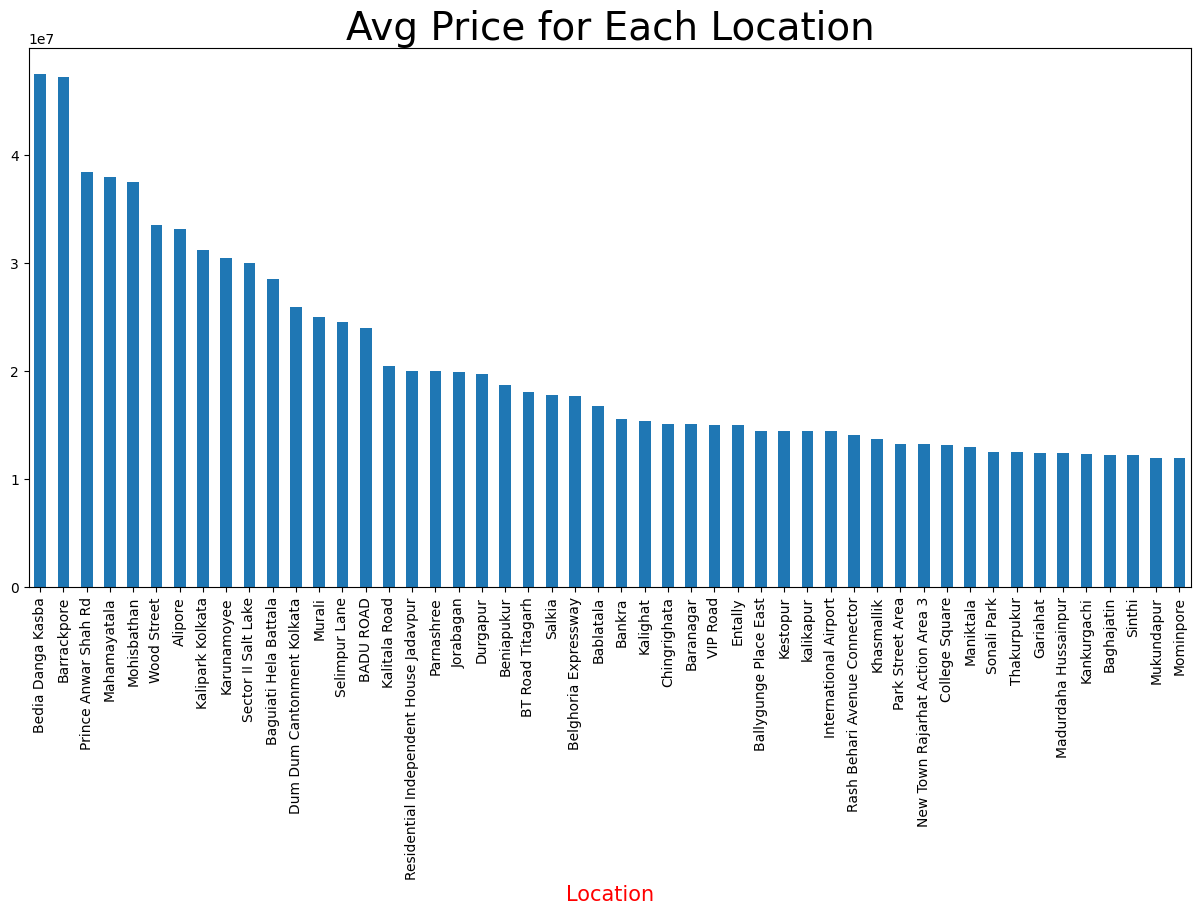

In [21]:
plt.figure(figsize=(15,7))
house_data.groupby("Location")['Price'].mean().sort_values(ascending=False)[:50].plot(kind="bar")
plt.xlabel("Location",size=15,c="r")
plt.title("Avg Price for Each Location",size=28,c="k")
plt.show()

**Conclusion**:Avg price is very high in Bedis Danga Kasba and Barrackpore

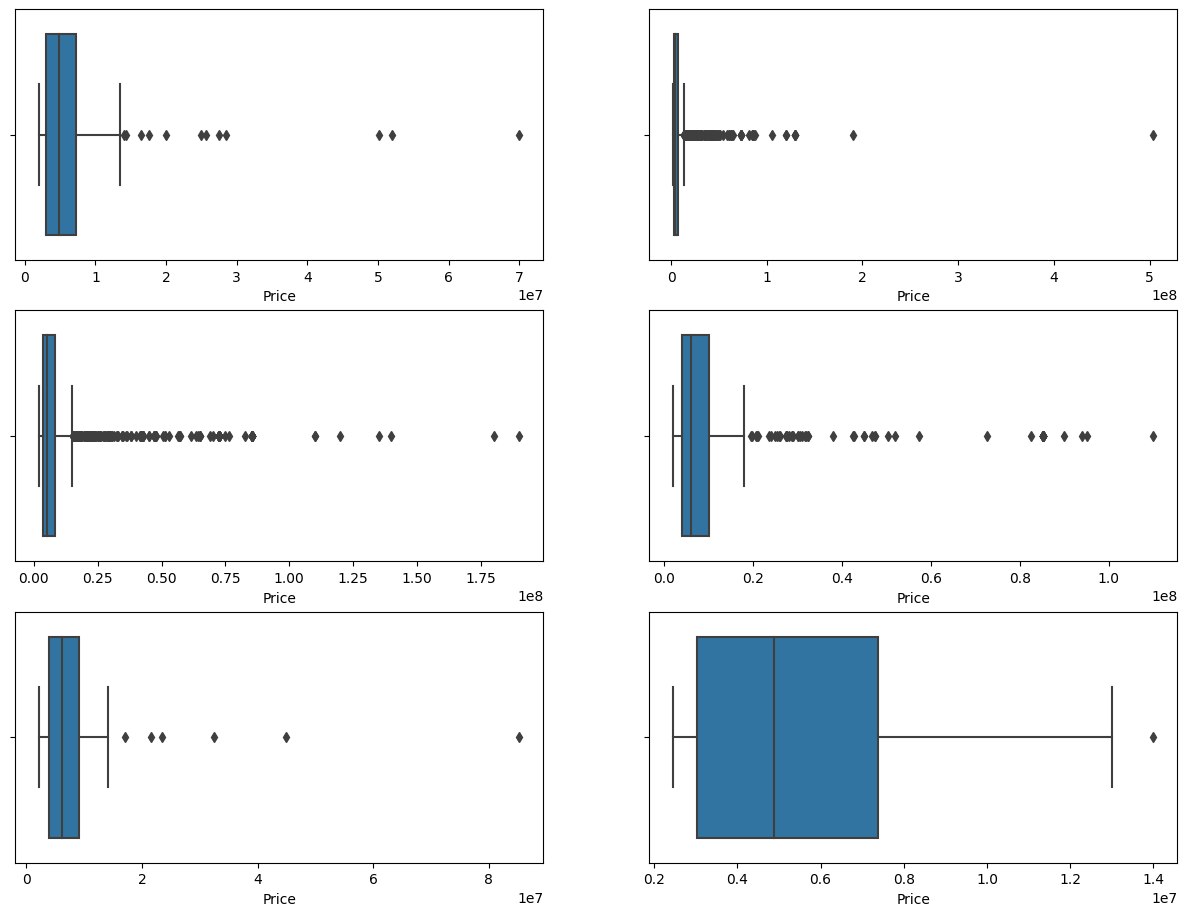

In [22]:
df_1=house_data[house_data['No. of Bedrooms']==1]
df_2=house_data[house_data['No. of Bedrooms']==2]
df_3=house_data[house_data['No. of Bedrooms']==3]
df_4=house_data[house_data['No. of Bedrooms']==4]
df_5=house_data[house_data['No. of Bedrooms']==5]
df_6=house_data[house_data['No. of Bedrooms']==6]
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.boxplot(data=df_1,x=df_1['Price'])
plt.subplot(4,2,2)
sns.boxplot(data=df_2,x=df_2['Price'])
plt.subplot(4,2,3)
sns.boxplot(data=df_3,x=df_3['Price'])
plt.subplot(4,2,4)
sns.boxplot(data=df_4,x=df_4['Price'])
plt.subplot(4,2,5)
sns.boxplot(data=df_5,x=df_5['Price'])
plt.subplot(4,2,6)
sns.boxplot(data=df_6,x=df_6['Price'])
plt.show()

# Multivariate Analysis

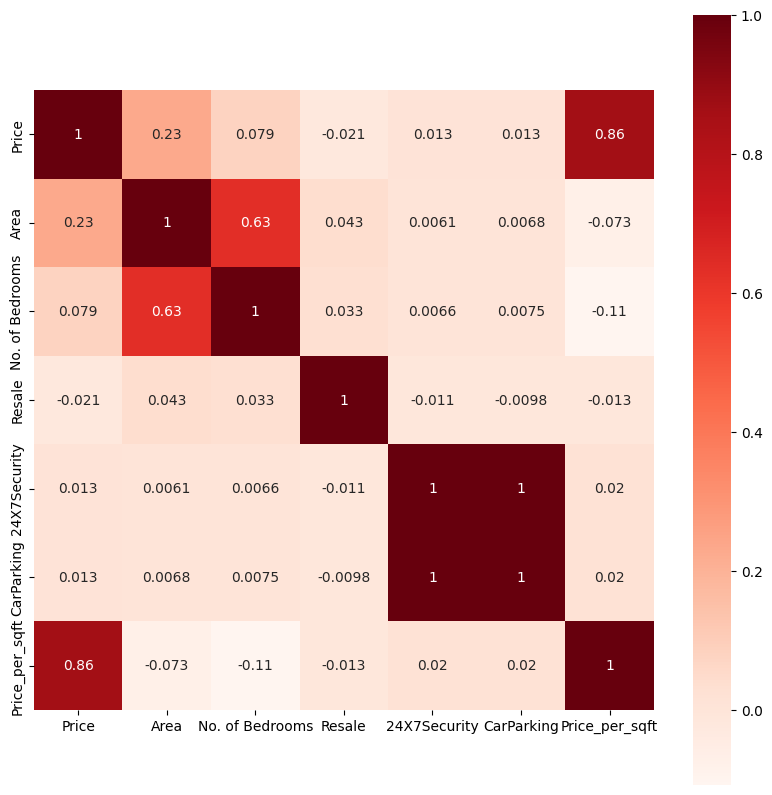

In [23]:
# Correlation
house_corr=house_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(house_corr,square=True,cbar=True,annot=True,cmap='Reds')
plt.show()

In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
house_data['Location']=label_encoder.fit_transform(house_data['Location'])

In [25]:
def removeOutliners(df):
    df_Out = pd.DataFrame()
    for key,subdf in df.groupby('Location'):
        m=np.mean(subdg.Price_per_sqft)
        st=np.std(subdf.Price_per_sqft)
        reduced=subdg[(subdg.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_Out = pd.concat([df_Out,reduced],ignore_index=True)
        return df_Out
    house_data = removeOutliners(house_data)

In [26]:
house_data.shape

(6507, 8)

# Train Test Split

In [27]:
X=house_data.drop(columns=['Price'],axis=1)
Y=house_data['Price']

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(6507, 7) (4554, 7) (1953, 7)


In [30]:
print(Y.shape,Y_train.shape,Y_test.shape)

(6507,) (4554,) (1953,)


# Model Building

**Linear Regression**:

In [31]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)

LR_prediction=lr_clf.predict(X_test)
print('R2 Score: ',r2_score(LR_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(LR_prediction,Y_test))
print('MSE:',mean_squared_error(LR_prediction,Y_test))
rmse = sqrt(mean_squared_error(LR_prediction,Y_test))
print('RMSE:',rmse)

R2 Score:  74.00709034823814
MAE: 2100860.1894104322
MSE: 33535816094961.258
RMSE: 5791011.66420525


In [32]:
# Hence the Linear Regression model gives 74% accuracy in House Price Prediction of Kolkata